# **MRMS/CCRFCD** rain-gauge data analysis
---

- Time Period: [2021.01.01-2025.07.25]

### 0. Package setup

In [3]:
# !pip install numpy pandas matplotlib scikit-learn -q

### 1. Exploring the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime


ALL_EVENTS_DF_P1 = "./data/2021-01-01_2025-07-25_gt_p1.csv"
ALL_EVENTS_DF_P2 = "./data/2021-01-01_2025-07-25_gt_p2.csv"

# load in the dataset
df_p1 = pd.read_csv(ALL_EVENTS_DF_P1)[['gauge_idx', 'start_datetime_utc', 'end_datetime_utc', 'gauge_acc_in', 'mrms_q3evap_qpe', 'lat', 'lon']]
df_p2 = pd.read_csv(ALL_EVENTS_DF_P2)[['gauge_idx', 'start_datetime_utc', 'end_datetime_utc', 'gauge_acc_in', 'mrms_q3evap_qpe', 'lat', 'lon']]
df    = pd.concat([df_p1, df_p2], axis=0)

# convert -> datetime objects
df['start_datetime_utc'] = pd.to_datetime(df['start_datetime_utc'], errors='coerce', utc=True)
df['end_datetime_utc']   = pd.to_datetime(df['end_datetime_utc']  , errors='coerce', utc=True)

df.head()

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon
0,4564.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.028250,-115.003639
1,4779.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.021861,-114.958750
2,4709.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.003937,35.925000,-115.117000
3,4724.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.015748,35.939417,-115.077750
4,4564.0,2021-01-23 23:02:00+00:00,2021-01-24 00:02:00+00:00,0.0,0.000000,36.028250,-115.003639


In [35]:
df[(df['mrms_q3evap_qpe'] - df['gauge_acc_in']) > 0.5][400:450]

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon
141971,4534.0,2021-09-10 20:36:00+00:00,2021-09-10 21:36:00+00:00,0.08,0.602362,36.258300,-115.119140
141993,4629.0,2021-09-10 20:36:00+00:00,2021-09-10 21:36:00+00:00,0.08,0.807087,36.009722,-115.169444
142047,4534.0,2021-09-10 20:38:00+00:00,2021-09-10 21:38:00+00:00,0.08,0.602362,36.258300,-115.119140
142055,4629.0,2021-09-10 20:38:00+00:00,2021-09-10 21:38:00+00:00,0.08,0.807087,36.009722,-115.169444
142115,4534.0,2021-09-10 20:40:00+00:00,2021-09-10 21:40:00+00:00,0.08,0.602362,36.258300,-115.119140
142122,4629.0,2021-09-10 20:40:00+00:00,2021-09-10 21:40:00+00:00,0.08,0.807087,36.009722,-115.169444
142175,4534.0,2021-09-10 20:42:00+00:00,2021-09-10 21:42:00+00:00,0.08,0.602362,36.258300,-115.119140
142193,4629.0,2021-09-10 20:42:00+00:00,2021-09-10 21:42:00+00:00,0.08,0.807087,36.009722,-115.169444
142240,4534.0,2021-09-10 20:44:00+00:00,2021-09-10 21:44:00+00:00,0.08,0.602362,36.258300,-115.119140
142259,4629.0,2021-09-10 20:44:00+00:00,2021-09-10 21:44:00+00:00,0.08,0.803150,36.009722,-115.169444


In [5]:
at_least_one_pos_precip_mask = (df['gauge_acc_in'] >= 0.04) | (df['mrms_q3evap_qpe'] >= 0.04)
df_non_zero = df[at_least_one_pos_precip_mask]

print(f"# Data points  : {len(df)}")
print(f"# Unique gauges: {len(set(df['gauge_idx']))}")
print("---------------------------------------------------------")
print(f"# Data points   w/ 1+ value >= 0.04: {len(df_non_zero)}")
print(f"# Unique gauges w/ 1+ value >= 0.04: {len(set(df_non_zero['gauge_idx']))}")

# Data points  : 1557506
# Unique gauges: 220
---------------------------------------------------------
# Data points   w/ 1+ value >= 0.04: 574388
# Unique gauges w/ 1+ value >= 0.04: 220


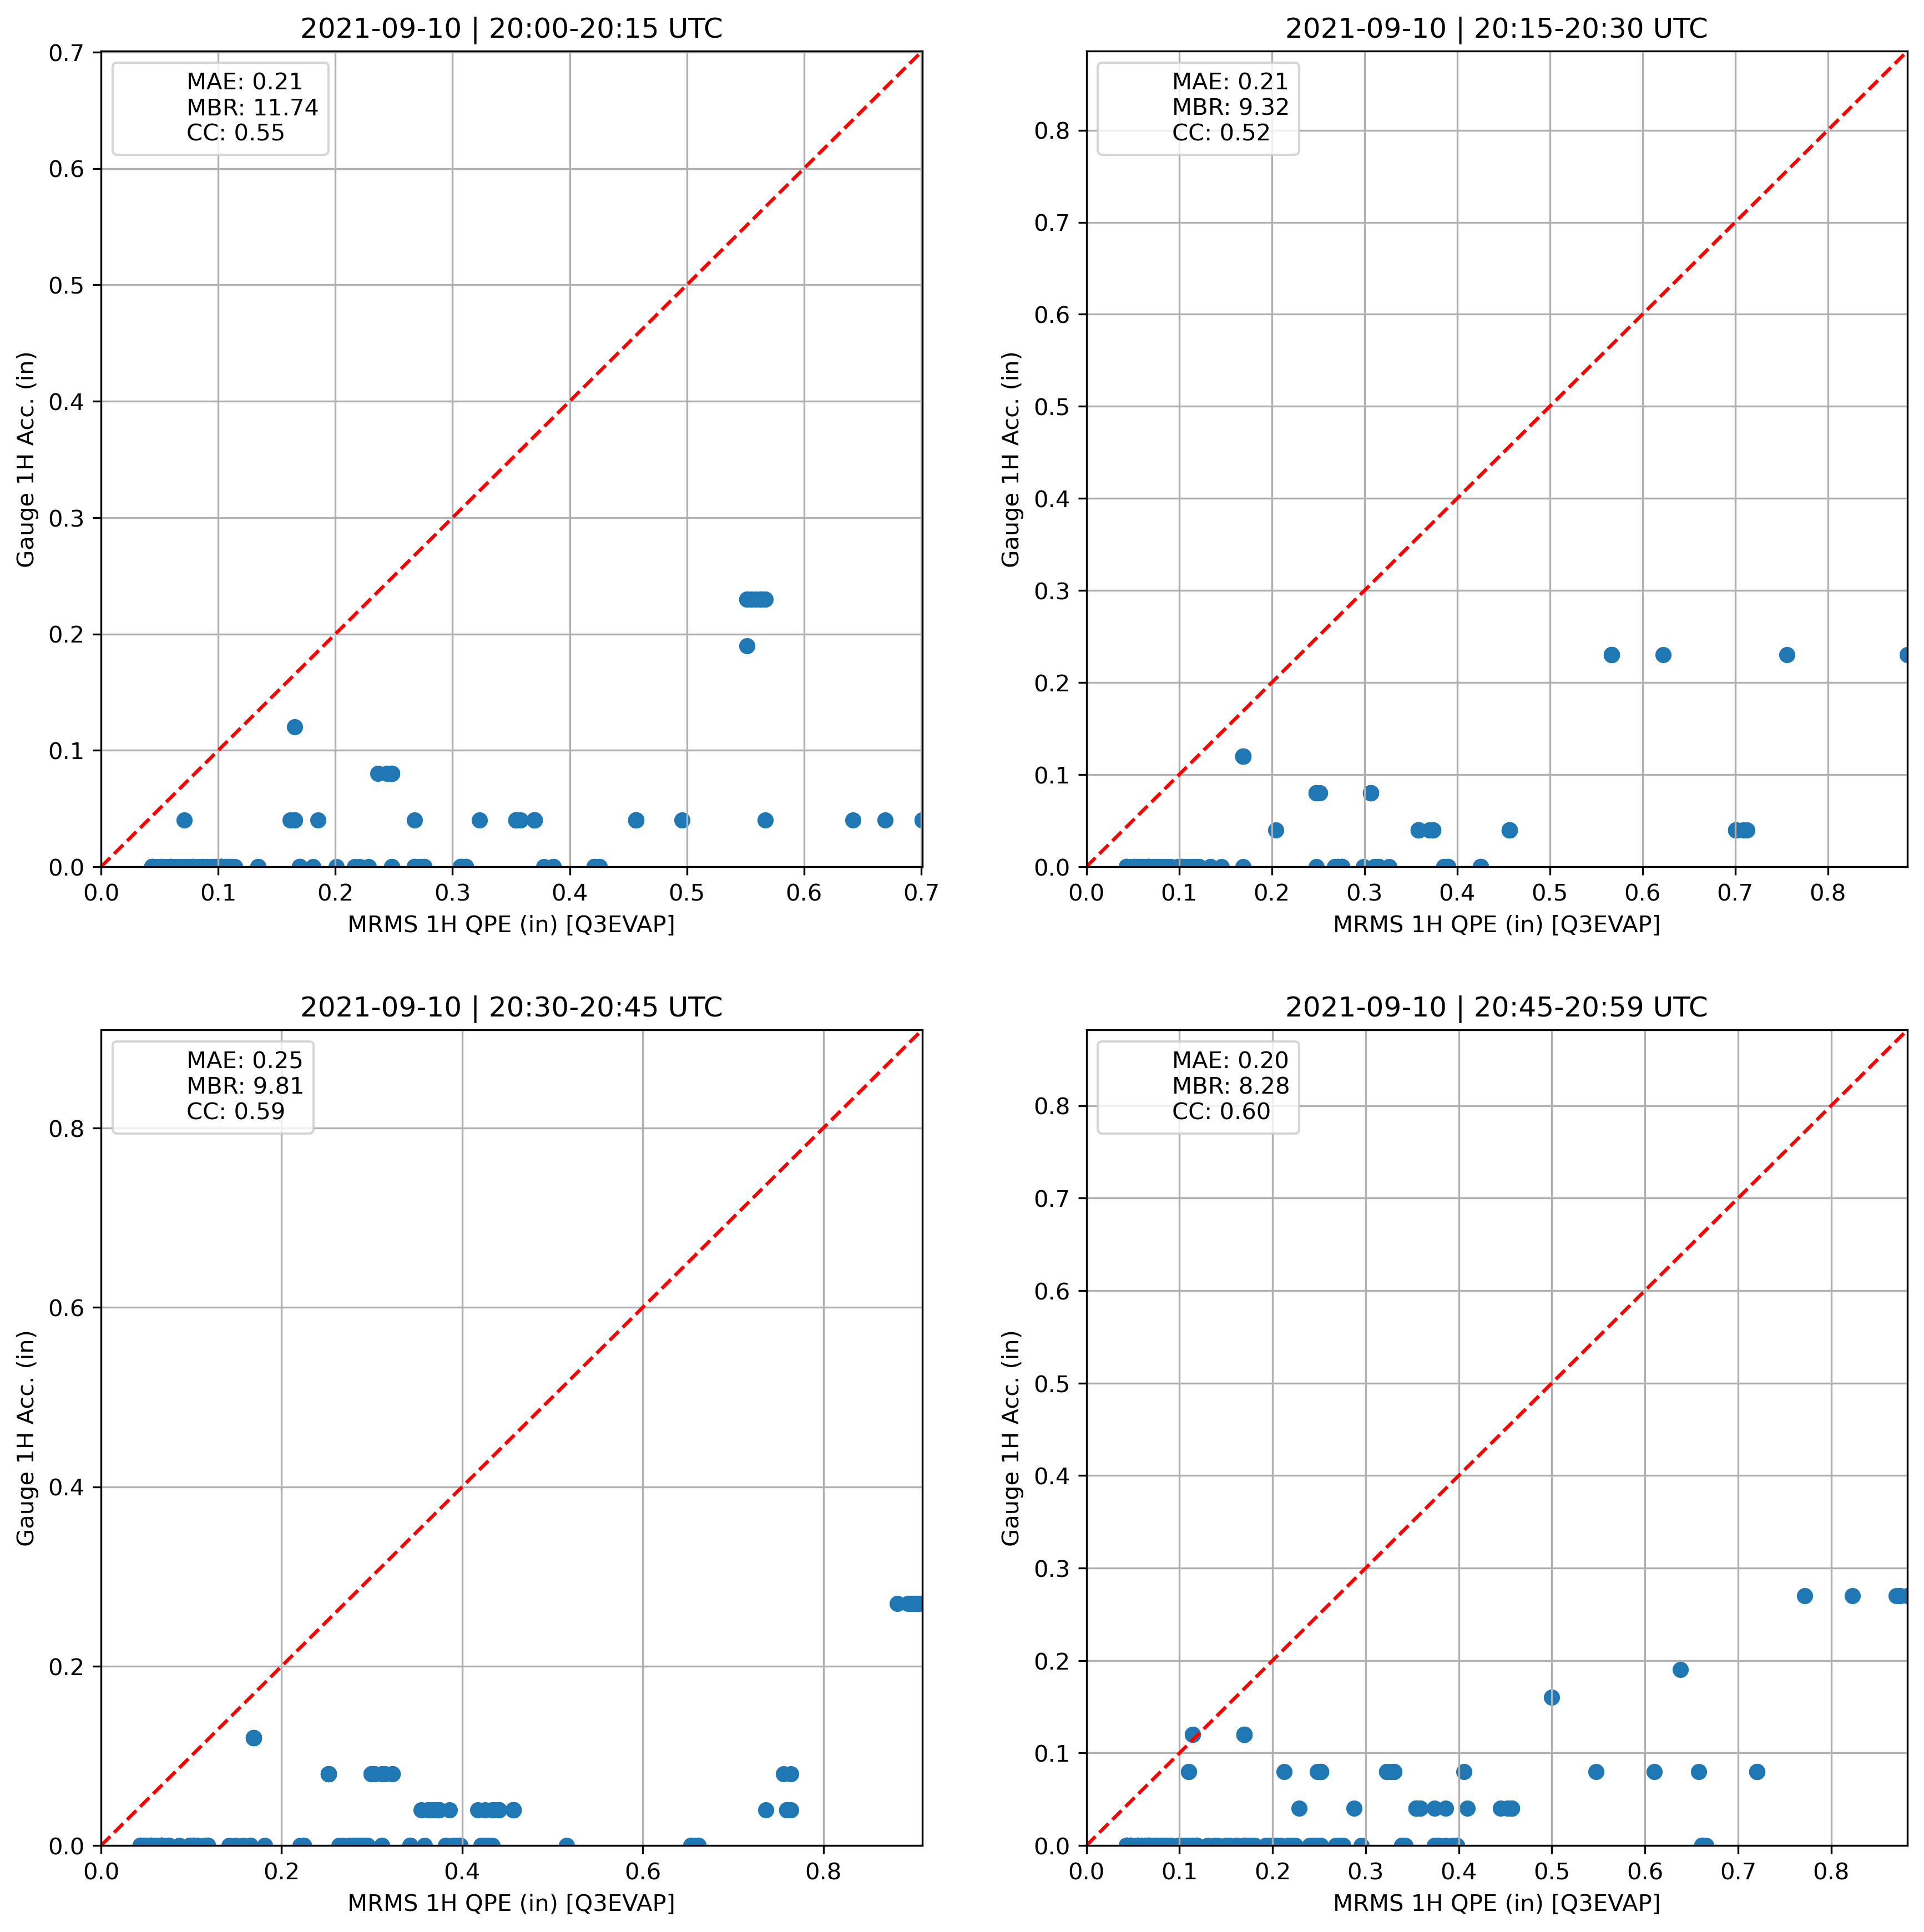

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


YEAR  = 2021
MONTH = 9
DAY   = 10
HOUR  = 20

# 21Z (endtime) on sep. 2 2023
year_mask     = df_non_zero['end_datetime_utc'].dt.year  == YEAR
month_mask    = df_non_zero['end_datetime_utc'].dt.month == MONTH
day_mask      = df_non_zero['end_datetime_utc'].dt.day   == DAY
hour_mask     = df_non_zero['end_datetime_utc'].dt.hour  == HOUR

fig = plt.figure(figsize=(14, 14), dpi=300)
gs  = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], wspace=0.2)
ax1 = fig.add_subplot(gs[0, 0],)
ax2 = fig.add_subplot(gs[0, 1],)
ax3 = fig.add_subplot(gs[1, 0],)
ax4 = fig.add_subplot(gs[1, 1],)

x = np.arange(0, 4)
y = x

for i, ax in enumerate(fig.axes):

    start_minutes = i * 15
    end_minutes = start_minutes + 15
    if end_minutes > 59: end_minutes = 59

    min_mask      = (df_non_zero['end_datetime_utc'].dt.minute >= start_minutes) & (df_non_zero['end_datetime_utc'].dt.minute < end_minutes)
    rain_event_df = df_non_zero[year_mask & month_mask & day_mask & hour_mask & min_mask]

    xs  = np.array(list(rain_event_df['mrms_q3evap_qpe']))
    ys  = np.array(list(rain_event_df['gauge_acc_in']))

    eps = .00001


    mae = (abs(xs - ys)).mean()

    # mean bias ratio
    # (mean(pred) / mean(actual))
    # used in: https://journals.ametsoc.org/view/journals/aies/aop/AIES-D-22-0053.1/AIES-D-22-0053.1.pdf 
    mbr = xs.mean() / ys.mean()
    cc  = np.corrcoef(xs, ys)[0][1]

    ax.grid()
    ax.set_xlim(0, max(max(xs), max(ys)))
    ax.set_ylim(0, max(max(xs), max(ys)))
    ax.scatter(xs, ys, label=f"CC: {cc:.2f}");

    ax.set_xlabel("MRMS 1H QPE (in) [Q3EVAP]")
    ax.set_ylabel("Gauge 1H Acc. (in)")
    ax.add_line(Line2D(x, y, color="red", linestyle="--", label=f"MAE: {mae:.2f}"))
    ax.set_title(f"{YEAR}-{MONTH:02d}-{DAY:02d} | {HOUR:02d}:{start_minutes:02d}-{HOUR:02d}:{end_minutes:02d} UTC")

    label = f"MAE: {mae:.2f}\nMBR: {mbr:.02f}\nCC: {cc:.2f}"
    ax.legend(handles=[plt.Line2D([], [], color='none')], labels=[label])

Let's break down each of these columns:
- `gauge_idx`: the CCRFCD rain-gauge's ID number
- `start_datetime_utc`: beginning of rain accumulation period
- `end_datetime_utc`: end of rain accumulation period
- `gauge_acc_in`: **(inches)** sum of bucket tips recorded by gauge between `start_datetime_utc`/`end_datetime_utc`
- `mrms_q3evap_qpe`: **(inches)** cummulative rainfall recorded by MRMS Q3EVAP QPE algo between `start_datetime_utc`/`end_datetime_utc` at `lat`/`lon`
    - Value for *the **nearest** MRMS grid-cell* to `lat`/`lon`
- `lat`: lattitude of rain gauge
- `lon`: longitude of rain gauge

#### 1.1. Distribution of unique datetimes

In [ ]:
# t: unique timesteps in set of all timesteps {1, ..., n}
unique_dts = {s for s in set(df_non_zero['start_datetime_utc'])}
print(f"# Unique timesteps: {len(unique_dts)}")

# Unique timesteps: 44732


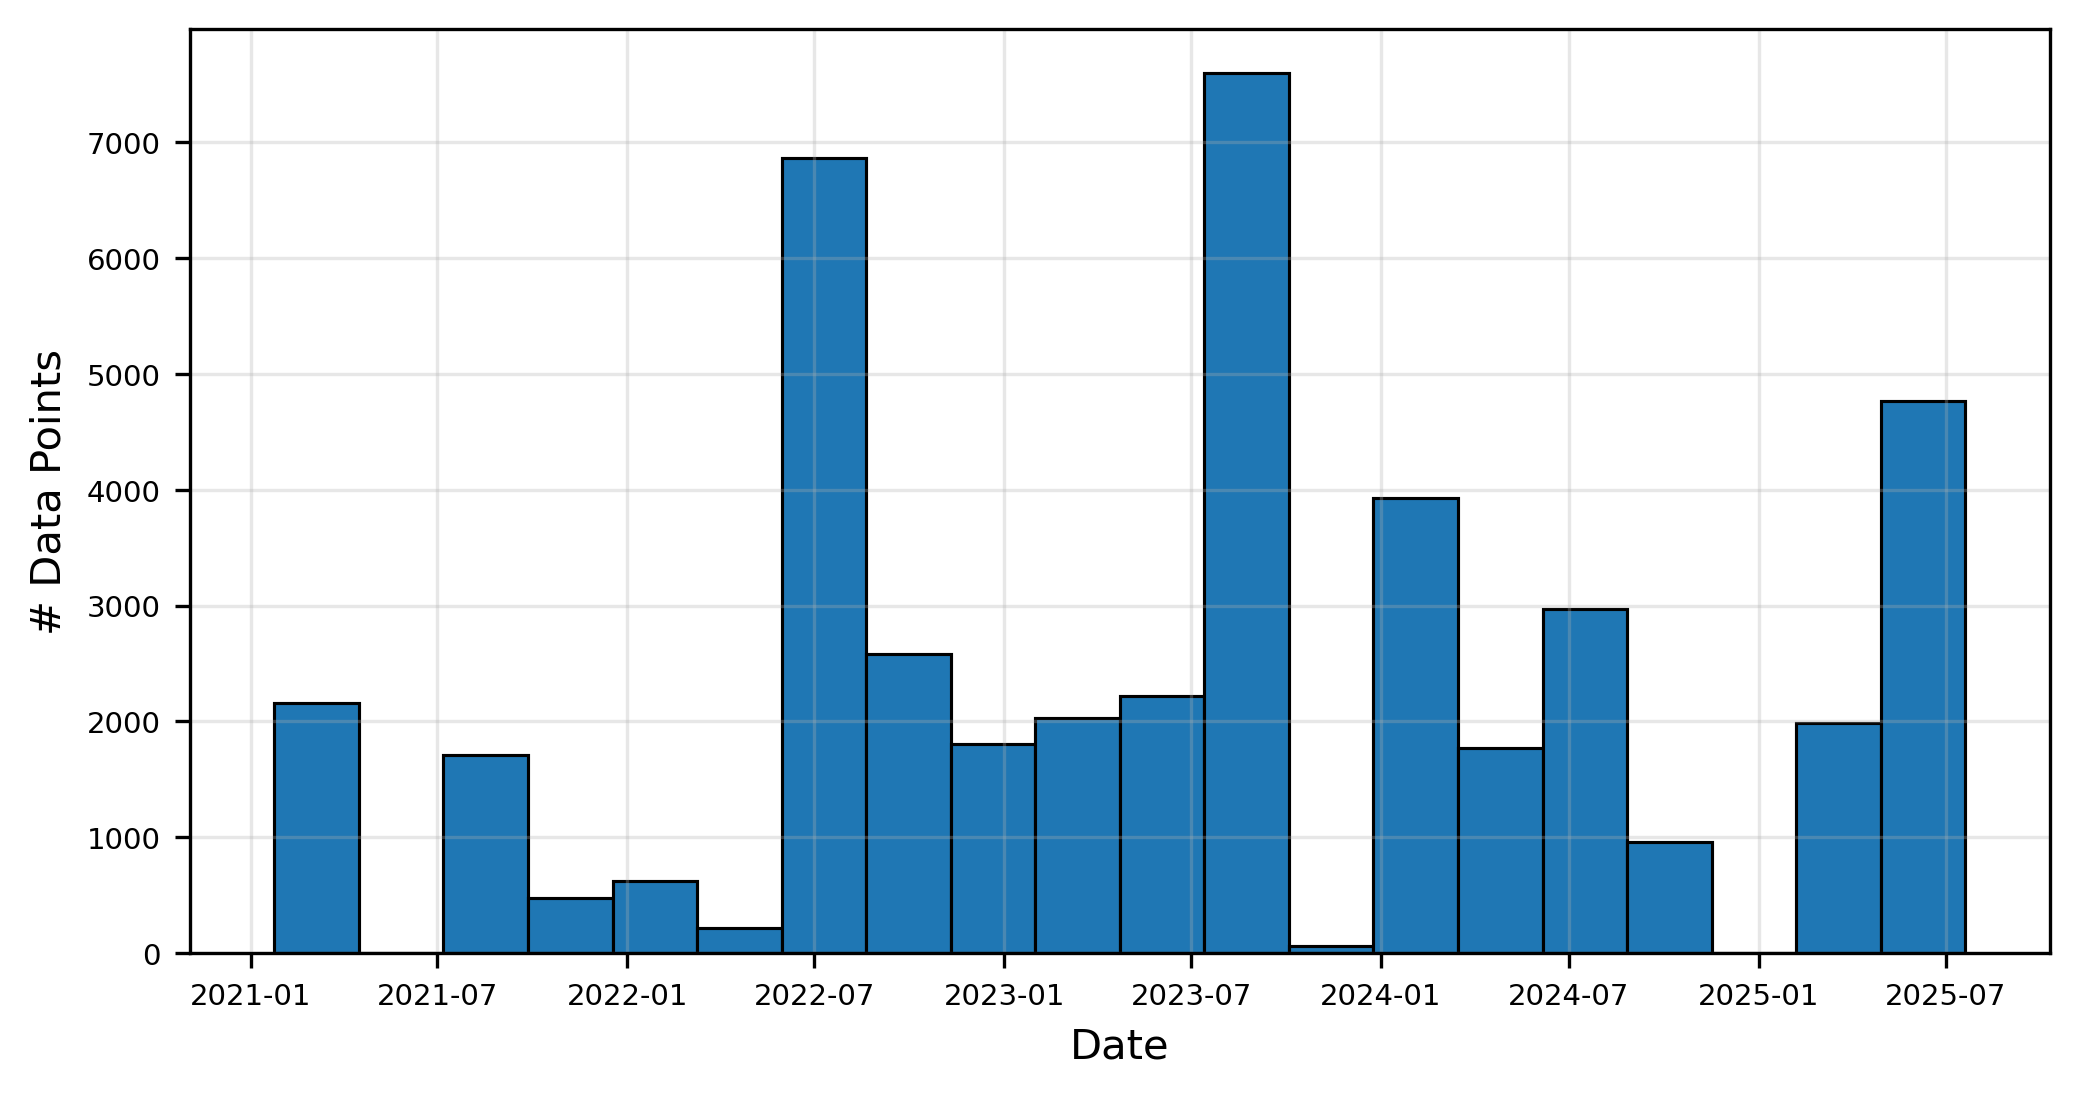

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

ax.hist(unique_dts, edgecolor='black', linewidth=0.75, bins=20)
ax.grid(alpha=0.3)

plt.xlabel("Date")
plt.xticks(fontsize=7)
plt.ylabel("# Data Points")
plt.yticks(fontsize=7)
plt.show()

#### 1.2. Distribution of total `mrms_qpe` by month

- Below we sum all the MRMS 1H-QPE values at each rain gauge.

In [ ]:
months = df_non_zero["start_datetime_utc"].dt.month
years  = df_non_zero['start_datetime_utc'].dt.year

all_values = []
for i in range(1, 13):
    month_arr = []
    for j in range(2021, 2025 + 1):
        mask       = months.between(i, i) & years.between(j, j)
        delta_qpes = df_non_zero.loc[mask, "mrms_q3evap_qpe"].tolist()
        total_qpe  = float(np.array(delta_qpes).sum())
        if total_qpe > 0.0:
            month_arr.append(total_qpe)
    all_values.append(month_arr)

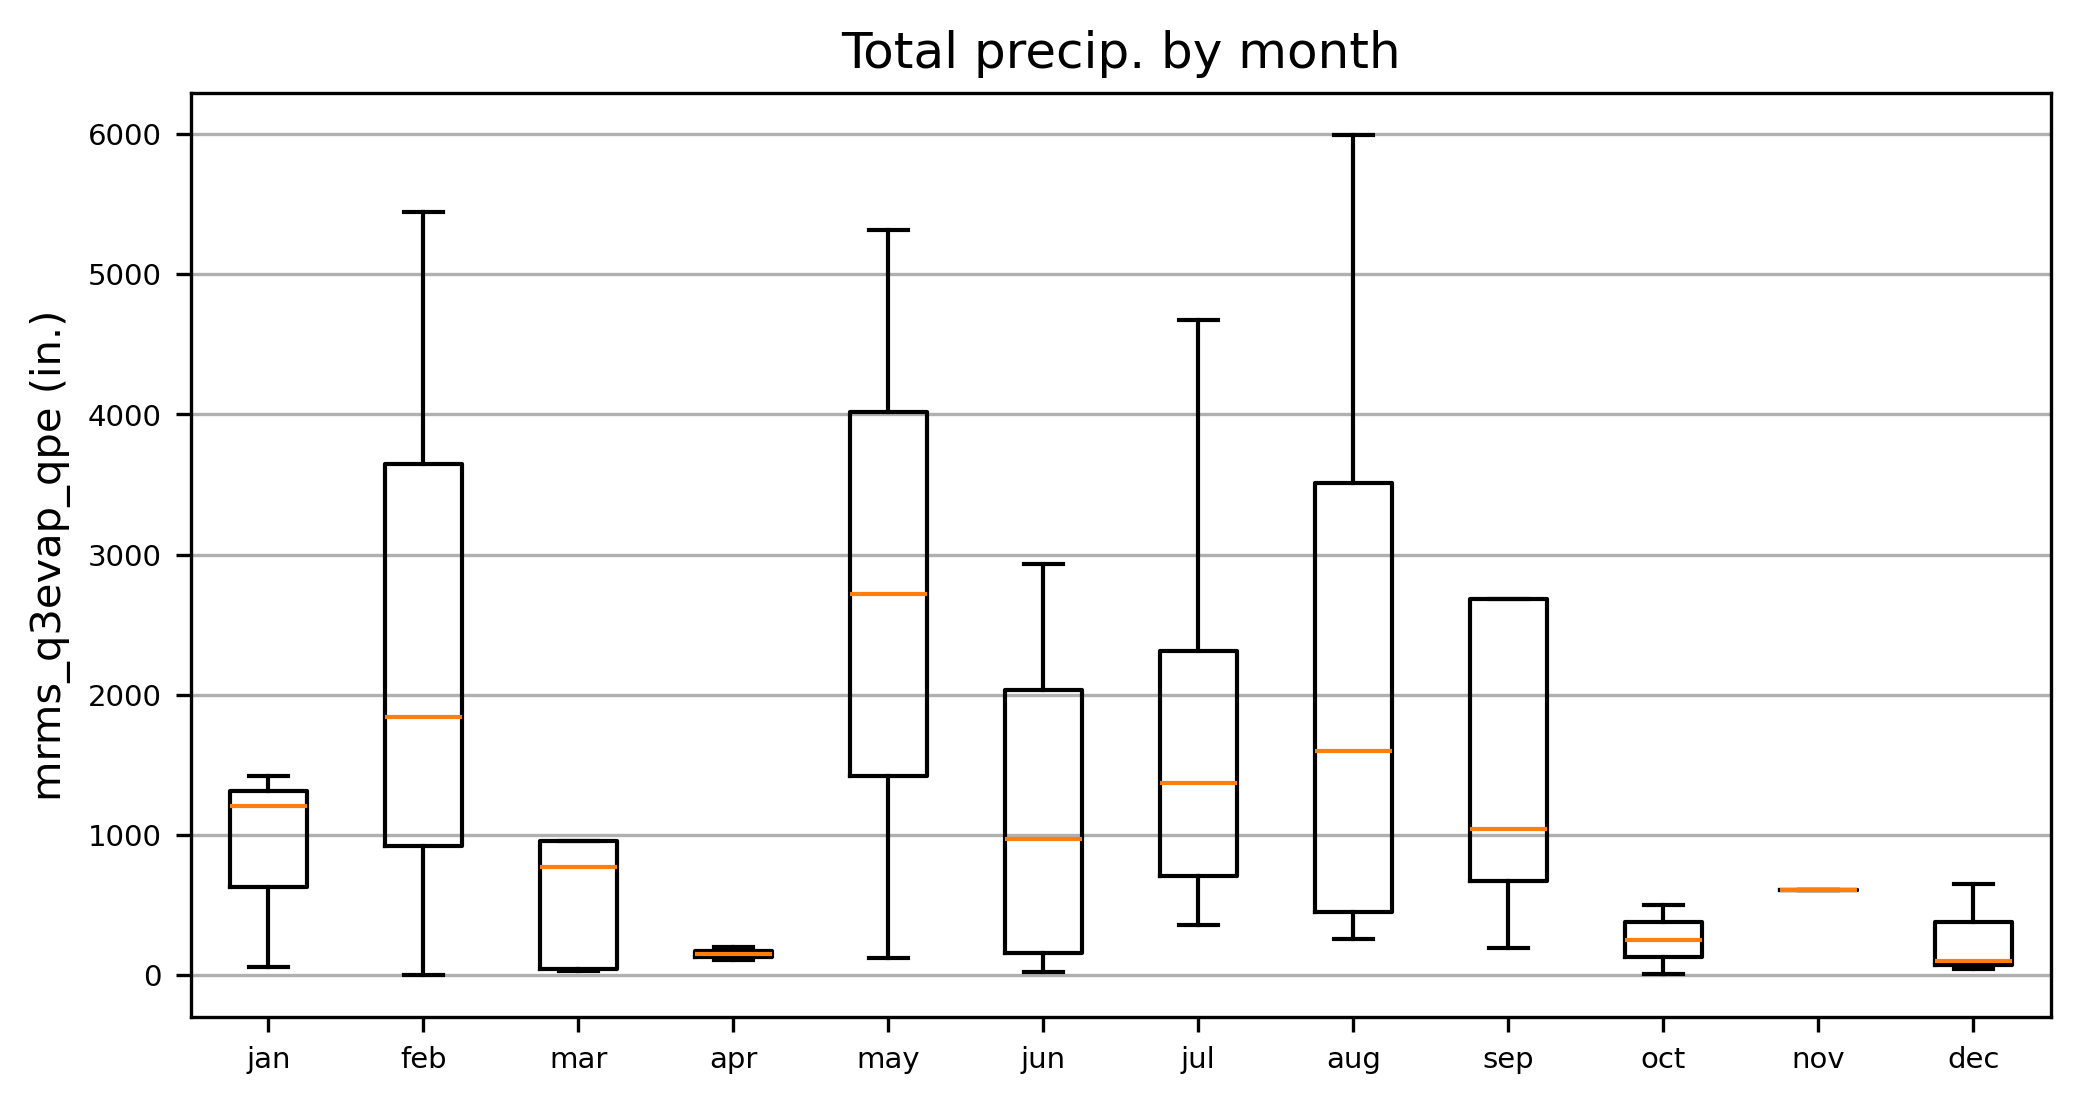

In [ ]:
fig, axs = plt.subplots(figsize=(8, 4), dpi=300)
axs.boxplot(
    all_values,
    notch=False,
    showfliers=False,
    )

axs.yaxis.grid(True)
axs.set_xticks([y + 1 for y in range(12)],
                  labels=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

plt.title("Total precip. by month")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel("mrms_q3evap_qpe (in.)")
plt.show()

### 2. Per-Event Analysis

#### 2.1. Constructing Synthetic Rainfall "Events"

- Currently, our dataset lacks any meaningful markers to segment moments in time into distinct rainfall "events". Below, we create synthetic "events" to analyize temporal effects on rain gauge bias.

In [ ]:
# sum of all MRMS values for all gauges at each unique timestep
grouped_df   = df_non_zero[['start_datetime_utc', 'mrms_q3evap_qpe']].groupby('start_datetime_utc').sum().copy()
cum_mrms_qpe = grouped_df['mrms_q3evap_qpe']
series       = np.asarray(list(cum_mrms_qpe))

# lower bound of total precip at a timestep
# we denote this to be a "dry" period
p50          = np.percentile(series, 50)
print(f"50th percentile MRMS 1H-QPE: {p50:0.4f} in.")

50th percentile MRMS 1H-QPE: 0.1929 in.


In [ ]:
def segment_rainfall_events(
        precip_array: np.ndarray, 
        interval_minutes=2, 
        wet_period_mins=15, 
        dry_period_mins=15,
        rain_threshold=p50,
    ) -> pd.DataFrame:
    """
    Segment a 1D array of total precip. values into 
        distinct events (i.e., [`start_time`, `end_time`]).

    Params
    - `wet_period_mins`
        - Number of minutes that must elapse where (rain_falling > rain_threshold) in order to begin a rainfall event
    - `dry_period_mins`
        - Number of minutes that must elapse where (rain_falling < rain_threshold) to label a period of time as "dry"

    Returns:
    ---
        pd.DataFrame: Columns include 'precipitation' and 'is_event' (bool).
    """

    # mask: rain is falling
    precip_series      = pd.Series(precip_array)
    is_rain: pd.Series = (precip_series > rain_threshold).astype(int)

    # our data is recorded with 2 minute timesteps
    # here, calculate the number of steps-per-interval
    wet_period_intervals = wet_period_mins // interval_minutes
    dry_period_intervals = dry_period_mins // interval_minutes
    
    rolling_wet     = is_rain.rolling(window=wet_period_intervals, min_periods=wet_period_intervals).sum()
    valid_wet_start = (rolling_wet == wet_period_intervals)
    rolling_dry     = is_rain.rolling(window=dry_period_intervals, min_periods=dry_period_intervals).sum()
    valid_dry_end   = (rolling_dry == 0)

    is_event = np.zeros_like(is_rain, dtype=bool)

    in_event = False
    start_idx = 0

    for i in range(len(is_rain)):
        if not in_event:

            # wait until a valid wet period starts
            if valid_wet_start.iloc[i]:
                in_event = True
                
                # start of rain
                start_idx = i - wet_period_intervals + 1 
        else:
            
            # if inside an event, check for a valid dry period to end the event
            if valid_dry_end.iloc[i]:
                end_idx = i - dry_period_intervals + 1
                is_event[start_idx:end_idx] = True
                in_event = False

    if in_event:
        is_event[start_idx:] = True

    return pd.DataFrame({
        'precipitation': precip_series,
        'is_event': is_event
    })

In [ ]:
# segment total precip array into "events"
rainfall_events = segment_rainfall_events(series)

event_ids = []
curr_id   = -1
in_event  = False

for is_event in rainfall_events['is_event'].values:
    if is_event:
        if not in_event:
            curr_id += 1
            in_event = True
        event_ids.append(curr_id)
    else:
        in_event = False
        event_ids.append(np.nan)

grouped_df['event_id'] = event_ids
event_ids_mapped       = dict(zip(grouped_df.index, grouped_df['event_id'].values))

In [ ]:
event_ids               = [event_ids_mapped[k] for k in list(df_non_zero['start_datetime_utc'])]
df_non_zero['event_id'] = event_ids
df_rain_events          = df_non_zero.loc[df_non_zero['event_id'] > 0.0]

print(f"# Data points for rain events: {len(df_rain_events)}")
print(f"# Unique events: {len(set(df_rain_events['event_id']))}")

# ~2.2M data points from rainfall "events"
df_rain_events.head()

# Data points for rain events: 529254
# Unique events: 238


/tmp/ipykernel_2299770/3807267842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['event_id'] = event_ids


,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,event_id
31598,4474.0,2021-01-26 12:48:00+00:00,2021-01-26 13:48:00+00:00,0.04,0.015748,36.081444,-115.199444,1.0
31624,4374.0,2021-01-26 12:48:00+00:00,2021-01-26 13:48:00+00:00,0.04,0.015748,36.122950,-115.119014,1.0
31630,4419.0,2021-01-26 12:48:00+00:00,2021-01-26 13:48:00+00:00,0.04,0.019685,36.044722,-115.299722,1.0
31631,4424.0,2021-01-26 12:48:00+00:00,2021-01-26 13:48:00+00:00,0.04,0.019685,36.087139,-115.305306,1.0
31652,4659.0,2021-01-26 12:48:00+00:00,2021-01-26 13:48:00+00:00,0.04,0.015748,36.068889,-115.087056,1.0


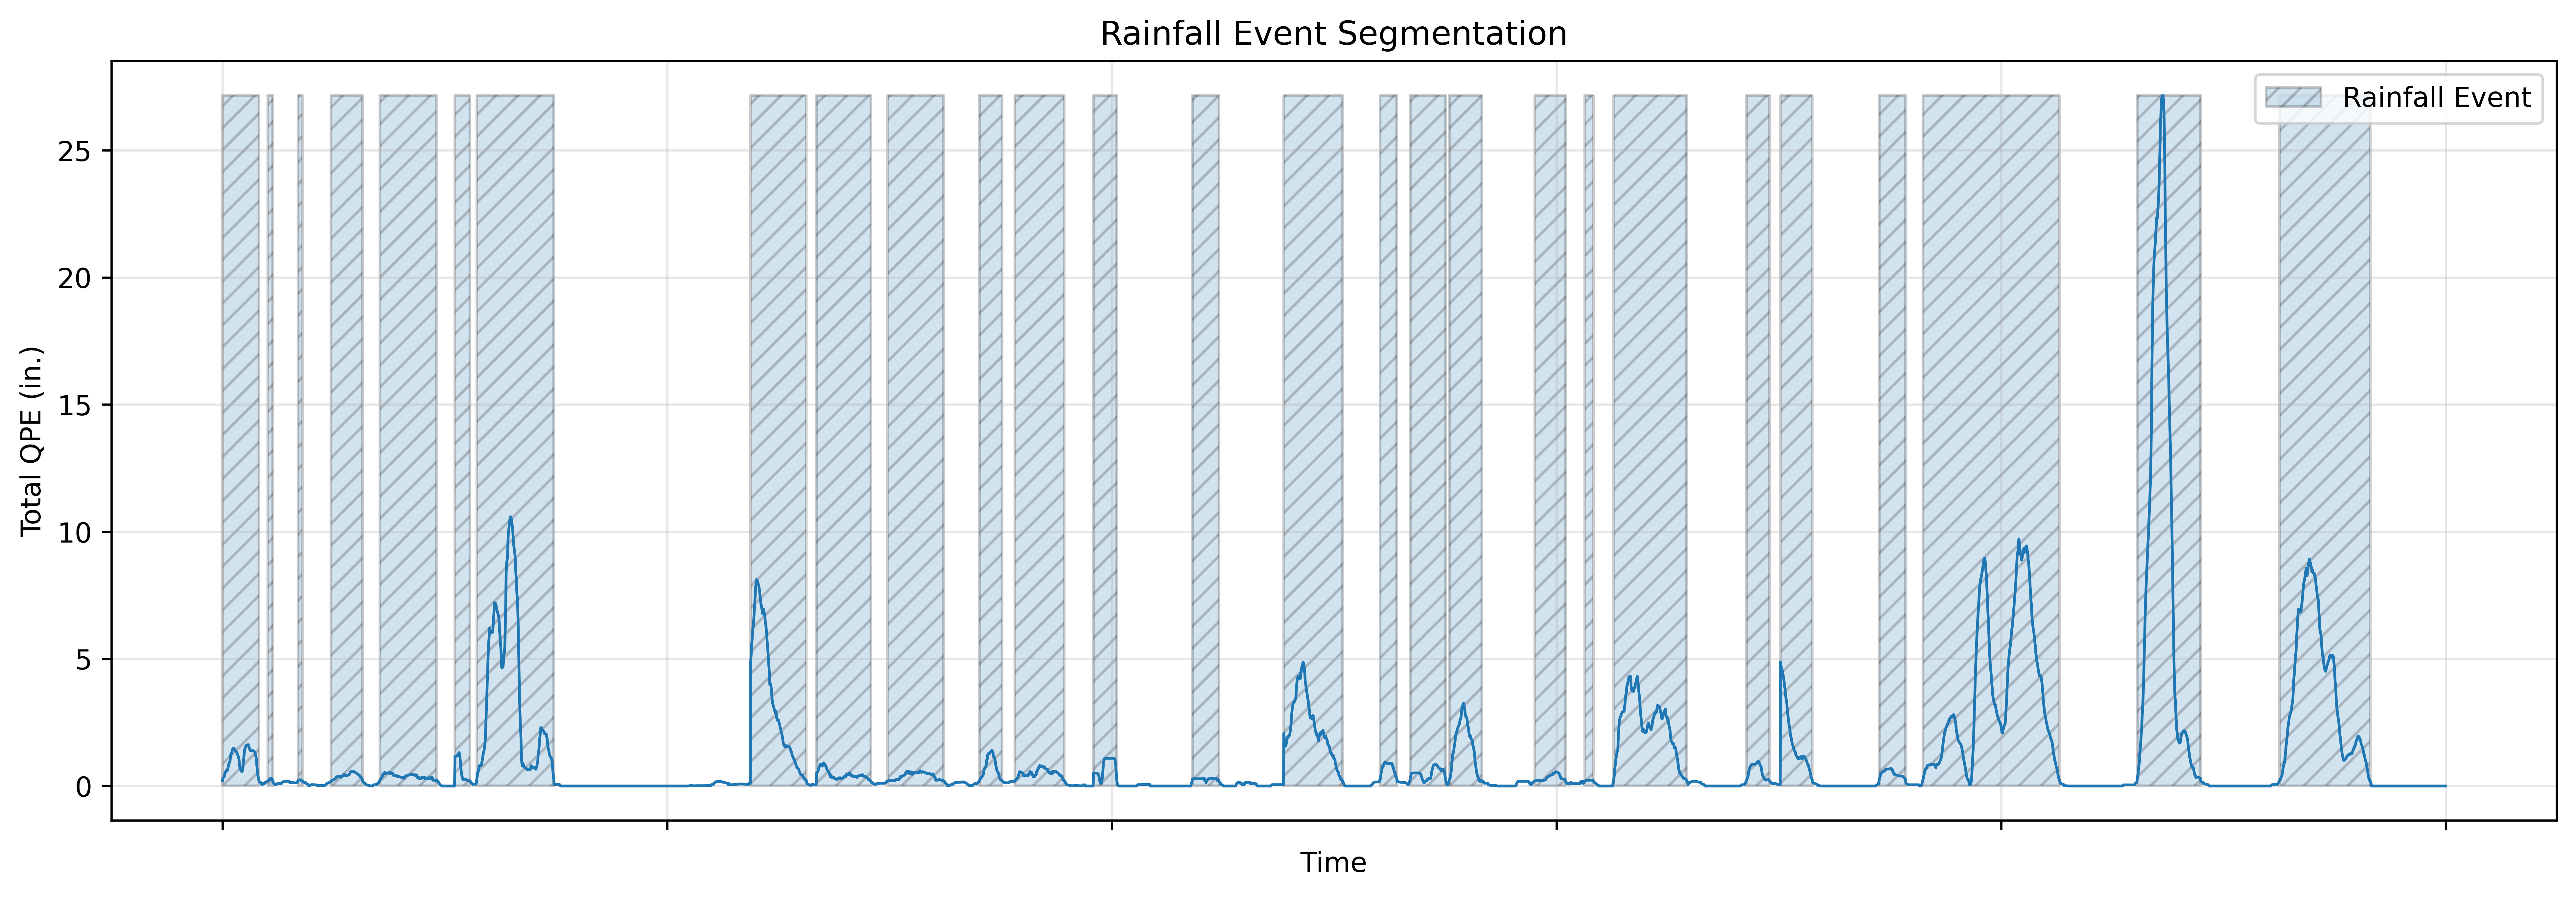

In [ ]:
rainfall_events_subset = rainfall_events[3000:8000]

fig, ax = plt.subplots(figsize=(16, 5), dpi=600)

x = np.arange(0, len(rainfall_events_subset))
y = rainfall_events_subset['precipitation']

ax.fill_between(
    x, 
    0, 
    y.max(), 
    where=rainfall_events_subset['is_event'] > 0.0, 
    hatch='///',
    label="Rainfall Event",
    edgecolor="black",
    alpha=0.2,
    )
ax.plot(x, y, linewidth=1.0, scaley=True)

ax.set_ylabel("Total QPE (in.)")
ax.set_xlabel("Time")
ax.set_xticklabels([])
ax.grid(alpha=0.3)
ax.legend(loc="upper right")

plt.title("Rainfall Event Segmentation")
plt.show()

#### 2.2. Rain-Event Statistics

In [ ]:
# create a list of `start_time` for each unique rain event
unique_events = df_rain_events.drop_duplicates(subset="event_id")
dts           = pd.to_datetime(unique_events["start_datetime_utc"]).tolist()

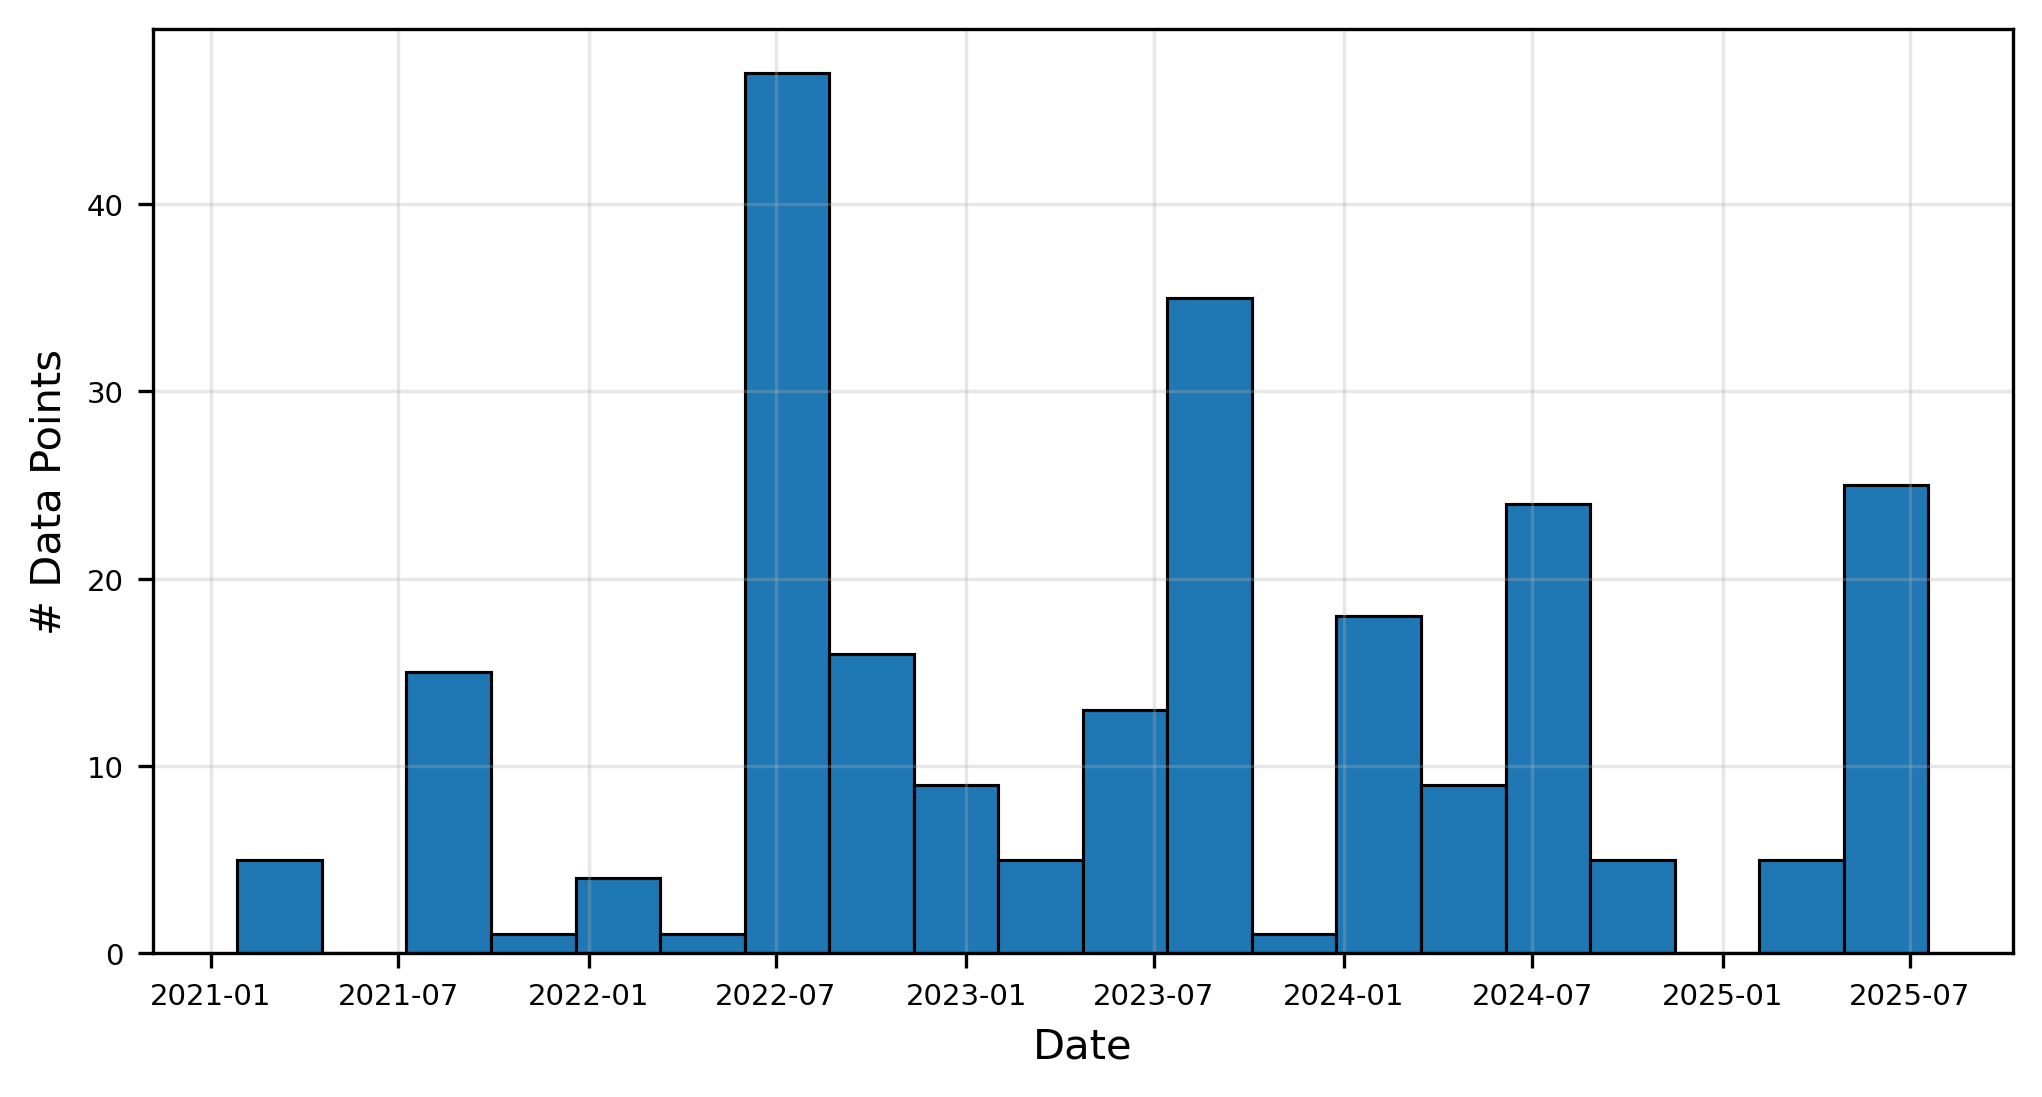

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

ax.hist(dts, edgecolor='black', linewidth=0.75, bins=20)
ax.grid(alpha=0.3)

plt.xlabel("Date")
plt.xticks(fontsize=7)
plt.ylabel("# Data Points")
plt.yticks(fontsize=7)
plt.show()

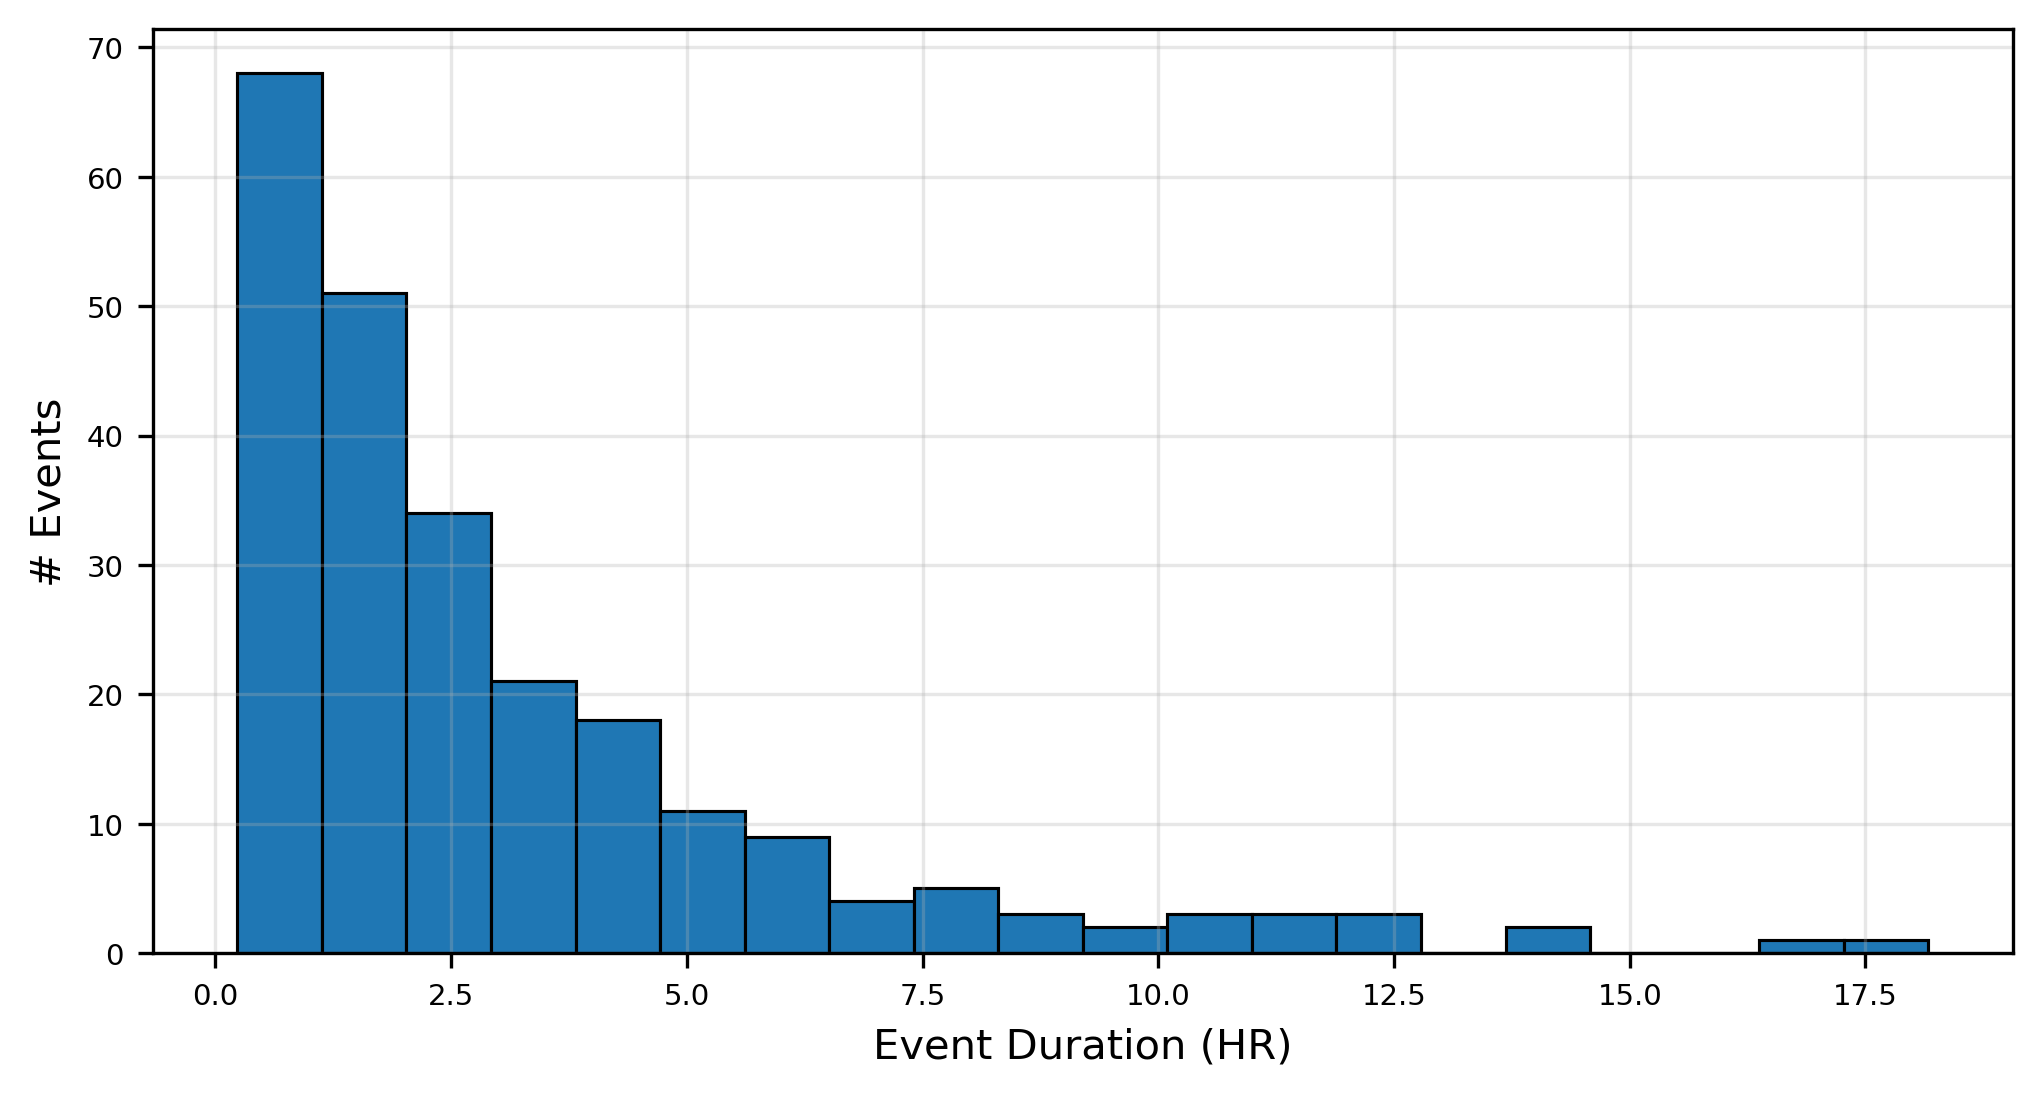

In [ ]:
# a bit of a hack to grab the duration of each event
durations = grouped_df.groupby('event_id').count()['mrms_q3evap_qpe']

# 2 min. buckets -> hrs
hr_durations = durations * (1/30)

fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

ax.hist(hr_durations, edgecolor='black', linewidth=0.75, bins=20)
ax.grid(alpha=0.3)

plt.xlabel("Event Duration (HR)")
plt.xticks(fontsize=7)
plt.ylabel("# Events")
plt.yticks(fontsize=7)
plt.show()

In [ ]:
cols         = ['start_datetime_utc', 'event_id', 'mrms_q3evap_qpe', 'gauge_acc_in']
df_re_subset = df_rain_events[cols]
df_re_subset = (
    df_re_subset.groupby(['event_id', 'start_datetime_utc'], as_index=False)
      .sum(numeric_only=True)
      .sort_values(['event_id', 'start_datetime_utc'])
)

df_re_subset['t_idx'] = df_re_subset.groupby('event_id').cumcount()

mrms_mat     = df_re_subset.pivot(index='event_id', columns='t_idx', values='mrms_q3evap_qpe')
gauge_mat    = df_re_subset.pivot(index='event_id', columns='t_idx', values='gauge_acc_in')
mrms_means   = np.nanmean(mrms_mat.to_numpy(),  axis=0)
gauge_means  = np.nanmean(gauge_mat.to_numpy(), axis=0)

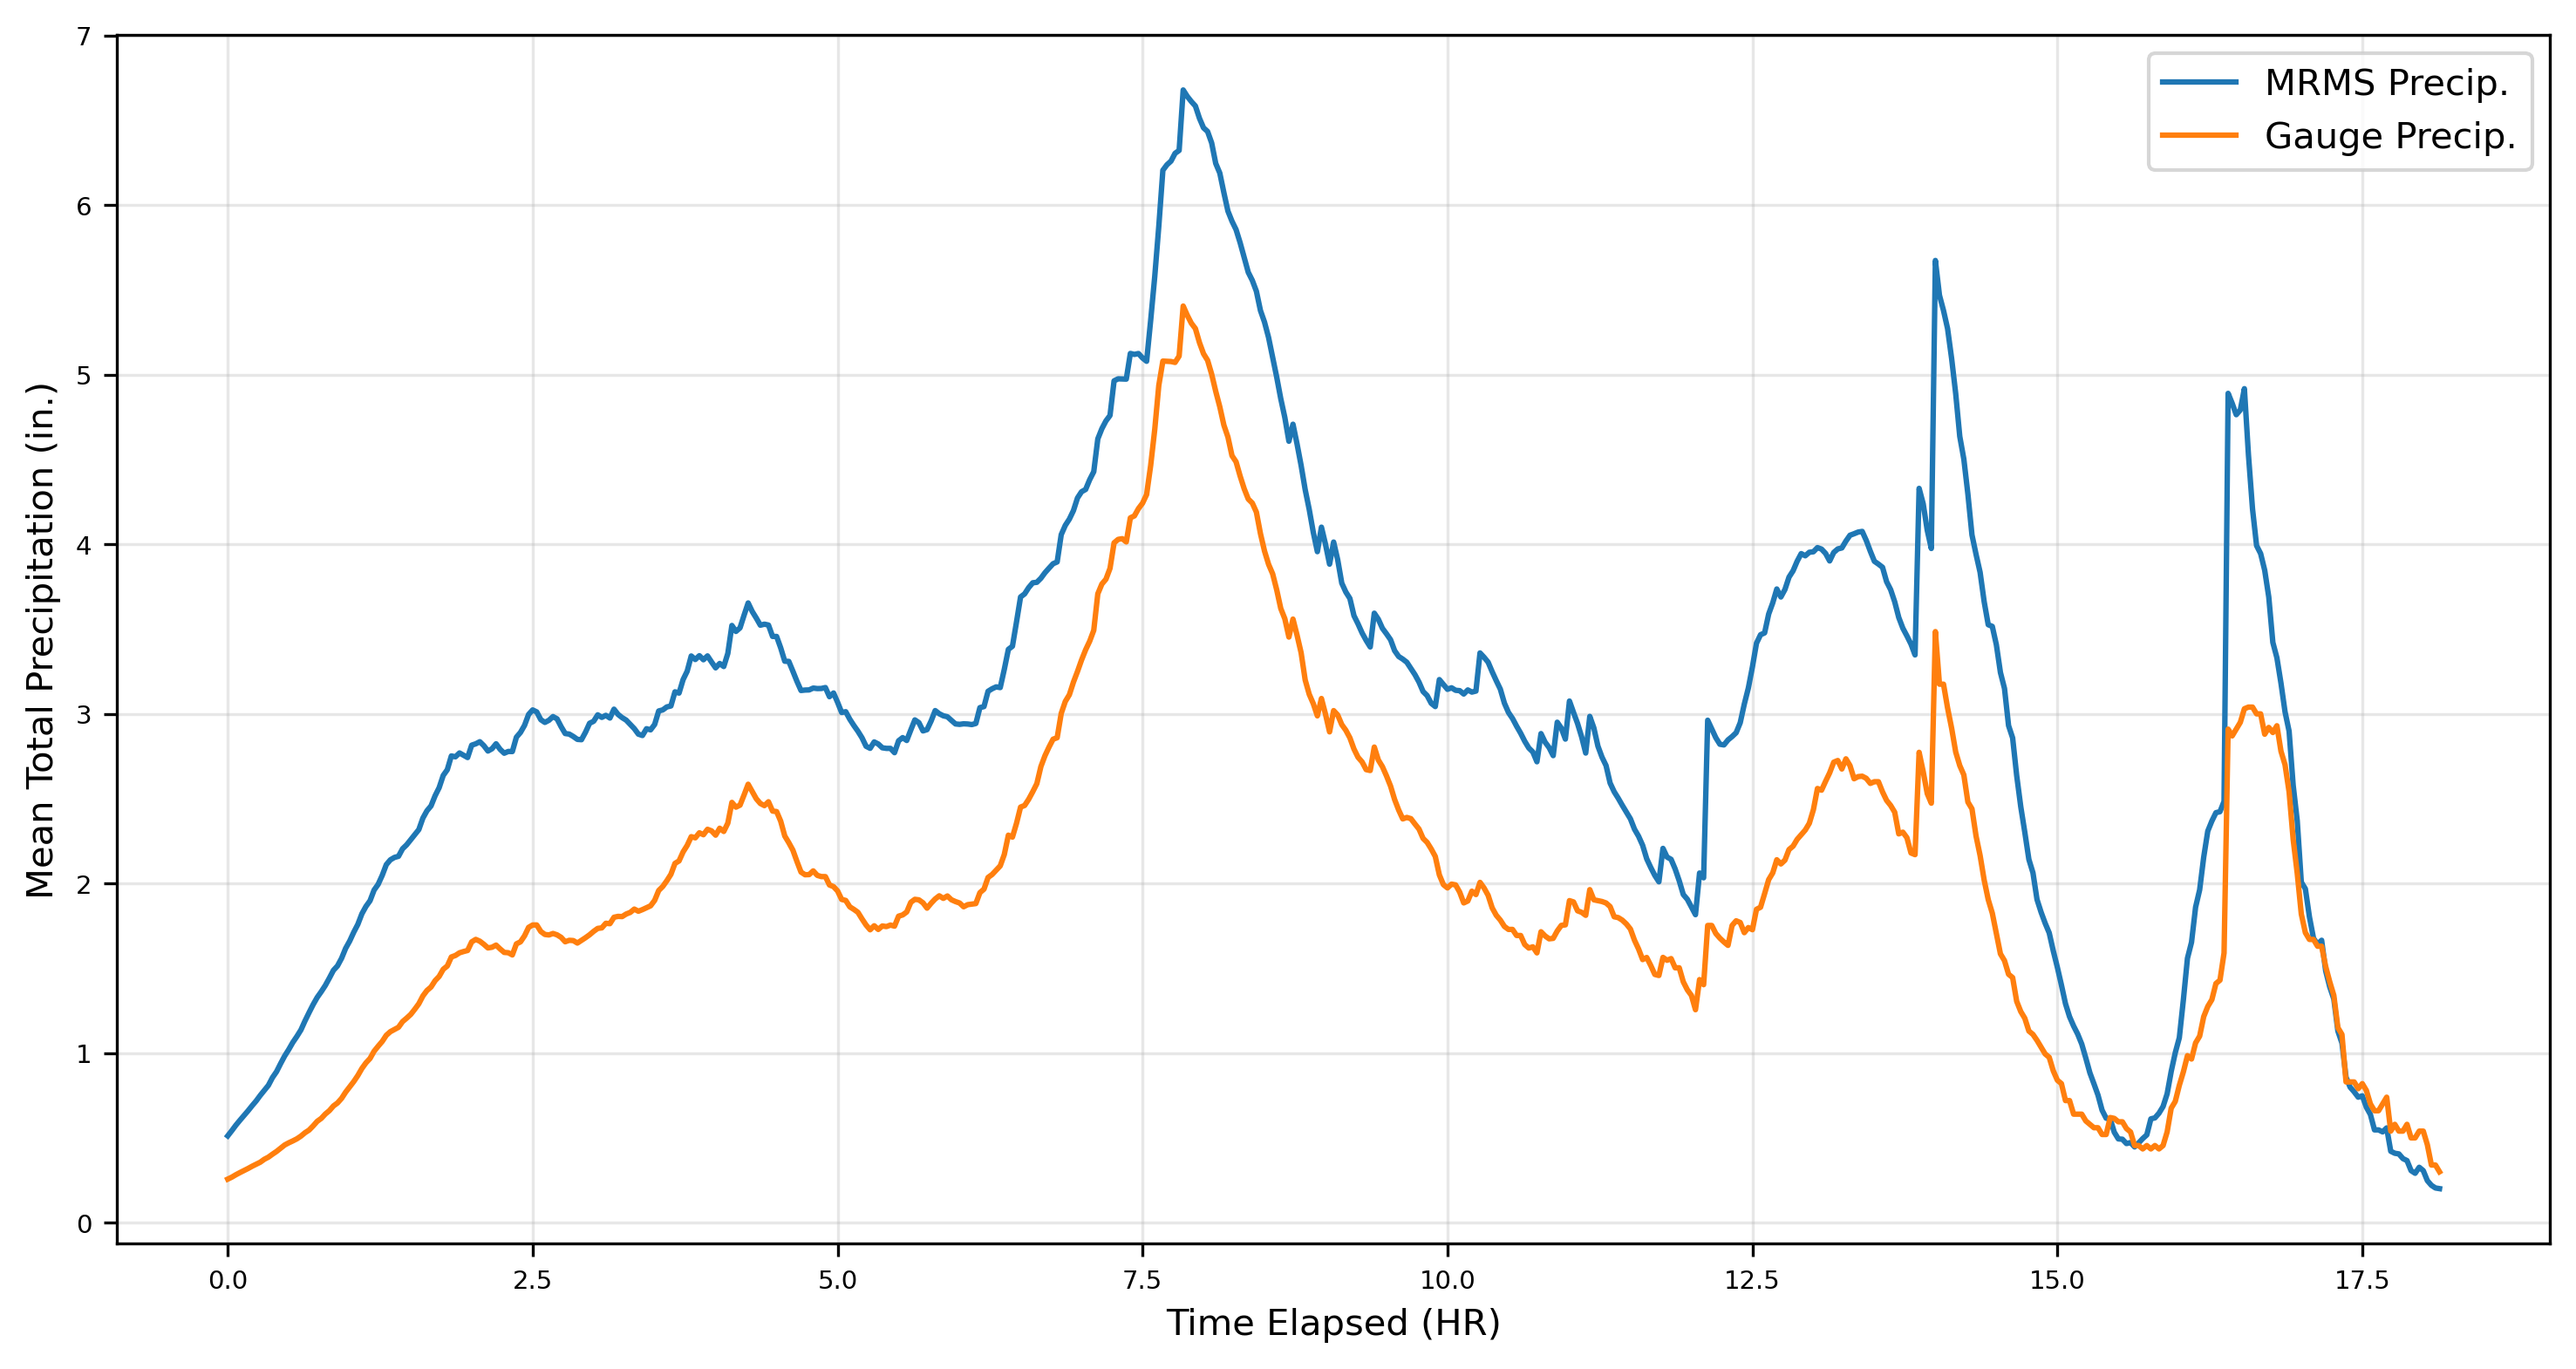

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

indices = [i/30 for i in range(len(mrms_means))]

ax.plot(indices, mrms_means, label="MRMS Precip.")
ax.plot(indices, gauge_means, label="Gauge Precip.")
ax.grid(alpha=0.3)

plt.xlabel("Time Elapsed (HR)")
plt.xticks(fontsize=7)
plt.ylabel("Mean Total Precipitation (in.)")
plt.yticks(fontsize=7)

plt.legend()
plt.show()

# Motivation
> Given the enviornmental setup $\mathcal{X}$ for a heavy precipitation event, can we predict the evolution of differences between MRMS radar-only QPE and ground-truth rain gauge data?
> Can we use a data-driven approach to confidently predict: *Will MRMS overestimate QPE today? If so, by how much and at which times/locations?*

# Analysis
- Rain gauge 1H QPE and MRMS 1H QPE are timeseries values; we want to predict one from the other w/ some extra context
- Want to be able to *tweak* various envionrmental parameters and view how predicted `mrms_qpe` (i.e., rain gauge bias) changes 
- Expect for gauge-bias to be *highest* towards the start of an event, decreasing as an event progresses

## Modeling
Develop a model $f_{\theta}(\mathcal{X}_{0}, \epsilon, k, t) = \hat{y}$
- $\mathcal{X}$: enviornmental state
    - *How to represent the enviornment?*
        - Surface obs (ASOS)
        - Sounding(s)
            - Pwat
        - Time of year
        - Radar context (e.g., brightband)
- $t \in \{0, 1, ..., n\}$: timestep (event-relative)
- $\epsilon$: rain gauge 1H acculated precip (in.)
- $k$: rain gauge location (i.e., lat/lon/elevation)
- $\hat{y}$: `mrms_qpe` (target variable)

## Evaluation
- Use case-studies from a held-out test set to evaluate performance of our bias estimator

## Sanity Check 
- Predict $g_{\theta}(\beta) = \hat{y}$
- Predict $g'_{\theta}(\beta, \rho) = \hat{y}$
- Predict $g''_{\theta}(\beta, \rho, t) = \hat{y}$
- Predict $f_{\theta}(\mathcal{X}_{0}, \beta, \rho, t) = \hat{y}$
- > Ensure that we see improvements in performance with each subsequent variable we add back

## Figures
- [3d scatter plot] enviornmental vars/model inputs & `gauge_qpe` vs `delta_qpe`
    - want to normalize by magnitude of `gauge_qpe`
- [multiple timeseries overlayed 2d plot] an interactive figure
    - select env. parameters ranges (e.g., 750dp above 80F)
    - select custom date-ranges
    - x_axis: time (min. from begining of event)
    - y_axis: 1H rainfall (in.)
    - plot: MRMS 1H-QPE; each gauge is an individual timeseries; plot a mean line with higher opacity
    - plot: CCRFCD rain-gauge 1H-QPE; each gauge is an individual timeseries; plot a mean line with higher opacity

## Next Steps
- [x] 1. plot the **correlation** (i.e., scatter plot) b/w `mrms_qpe`/`gauge_qpe` stratified by magnitudes
- [x] 2. check: has daylight savings time messed up alignment for some days/months?
    2a. answer: yes
- [ ] 3. document the CCRFCD/MRMS data alignment process in detail
    - create an `alignment/qc` notebook to probe dataset in

#### 3.1. Modeling the evolution of $\delta = \beta - y$ (rain gauge bias) throughout an event